In [15]:
pip install pandas_profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=21718a1b0c7798a2ef47baf22754294c9e8e2ea9bae3b357890320f849ab6327
  Stored in directory: c:\users\jesse\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.2-py3-none-any.whl size=1107415 sha256=c5b03eb396055d52fca99cffdf934e333061b703fa1a7119f2642b8fefdc7f92
  Stored in directory: c:\users\jesse\appdata\local\pip\cache\wheels\72\9a\23\097c93fd8341220d92674891b6a9a30f0e389719d9b7291bd2
Successfully built htmlmin phik
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
from IPython.display import JSON
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [7]:
with open('nyc_geo.json') as f:
    d = json.load(f)
data = pd.json_normalize(d['features'])
data[['0','1','3','4']] = data['properties.bbox'].apply(pd.Series)
data= data[['properties.borough','properties.name','0','1']]
data.columns = ['borough','neighborhood','longitude','latitude']

In [8]:
data

,borough,neighborhood,longitude,latitude
0,Bronx,Wakefield,-73.847201,40.894705
1,Bronx,Co-op City,-73.829939,40.874294
2,Bronx,Eastchester,-73.827806,40.887556
3,Bronx,Fieldston,-73.905643,40.895437
4,Bronx,Riverdale,-73.912585,40.890834
...,...,...,...,...
301,Manhattan,Hudson Yards,-74.000111,40.756658
302,Queens,Hammels,-73.805530,40.587338
303,Queens,Bayswater,-73.765968,40.611322
304,Queens,Queensbridge,-73.945631,40.756091


In [9]:
pluto=pd.read_csv('pluto.csv')
df2=pluto[['block','schooldist','council','zipcode','bldgclass','landuse','lotarea','bldgarea','numfloors','unitstotal','assesstot','yearbuilt','longitude','latitude']]
df2=df2.dropna()
df2=df2[df2.numfloors > 20]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,19,20,22,23,24,26,63,64,76,79,86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df1=df2.drop(['longitude','latitude'],axis=1)

In [11]:
df1

,block,schooldist,council,zipcode,bldgclass,landuse,lotarea,bldgarea,numfloors,unitstotal,assesstot,yearbuilt
7,1349,2.0,5.0,10022.0,D4,3.0,7400.0,93096.0,21.0,21.0,9643950.0,1930.0
21,65,2.0,1.0,10038.0,RC,5.0,7488.0,149160.0,23.0,2.0,25320708.0,2013.0
32,71,2.0,1.0,10038.0,RC,5.0,24121.0,462377.0,30.0,30.0,43605009.0,1983.0
33,74,2.0,1.0,10038.0,RC,5.0,41656.0,744146.0,35.0,36.0,79710304.0,1993.0
139,1413,2.0,4.0,10075.0,R4,3.0,6743.0,63158.0,21.0,66.0,11857051.0,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...
853646,1269,2.0,4.0,10019.0,D6,4.0,6778.0,227951.0,73.0,184.0,34887150.0,2015.0
853648,1270,2.0,4.0,10019.0,O4,5.0,27382.0,517199.0,34.0,32.0,81416700.0,1966.0
853929,859,2.0,4.0,10016.0,RM,4.0,7404.0,202855.0,55.0,139.0,38836357.0,2005.0
855445,1546,2.0,5.0,10028.0,D6,4.0,17988.0,268750.0,31.0,264.0,31336650.0,1977.0


In [12]:
y = df1.assesstot
X = df1.drop(['assesstot'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [13]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [16]:
from pandas_profiling import ProfileReport
prof = ProfileReport(X_train)
prof.to_file(output_file='output2.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler, MinMaxScaler

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant')),
                                       ('scaler', MinMaxScaler())
                                      ])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [18]:
# import the class
from sklearn.linear_model import LogisticRegression, LinearRegression, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor
# instantiate the model (using the default parameters)
logreg = RandomForestRegressor()

In [19]:
from sklearn.metrics import mean_absolute_error


# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', logreg)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 13332549.038936168


In [175]:
from sklearn.metrics import r2_score
r2_score(y_valid, preds)

0.8131677569524915

In [20]:
X.columns

Index(['block', 'schooldist', 'council', 'zipcode', 'bldgclass', 'landuse',
       'lotarea', 'bldgarea', 'numfloors', 'unitstotal', 'yearbuilt'],
      dtype='object')

(array([1.502e+03, 9.300e+01, 2.700e+01, 1.200e+01, 3.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.00000000e+00, 1.31098275e+08, 2.62196550e+08, 3.93294825e+08,
        5.24393100e+08, 6.55491375e+08, 7.86589650e+08, 9.17687925e+08,
        1.04878620e+09, 1.17988448e+09, 1.31098275e+09]),
 <BarContainer object of 10 artists>)

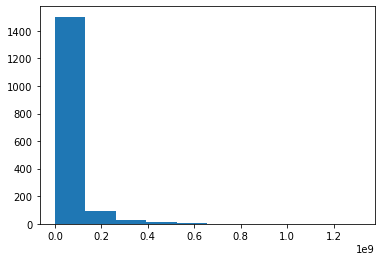

In [21]:
import matplotlib.pyplot as plt
plt.hist(y)

In [152]:
y.describe()

count    1.641000e+03
mean     5.655443e+07
std      8.227413e+07
min      0.000000e+00
25%      1.617075e+07
50%      3.311658e+07
75%      6.301980e+07
max      1.310983e+09
Name: assesstot, dtype: float64

In [22]:

X_scaled=preprocessor.fit_transform(df1)

In [23]:
# now we figure out the optimum number of clusters for kmeans
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


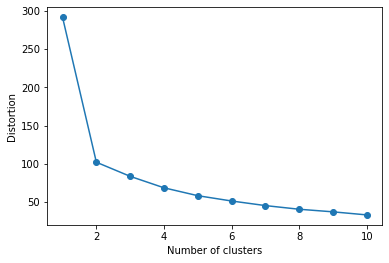

In [24]:
plot_distortion(X_scaled,max_clusters=10)

In [25]:
X_scaled = pd.DataFrame(X_scaled, columns= ['borough','schooldist','council','zipcode','bldgclass','landuse','lotarea','bldgarea','numfloors','unitstotal'],index=None)


In [26]:
X_scaled

,borough,schooldist,council,zipcode,bldgclass,landuse,lotarea,bldgarea,numfloors,unitstotal
0,0.085094,0.033333,0.081633,0.012426,0.285714,0.001168,0.004161,0.005988,0.001918,0.955446
1,0.003859,0.033333,0.000000,0.021893,0.571429,0.001185,0.006704,0.029940,0.000183,0.996535
2,0.004239,0.033333,0.000000,0.021893,0.571429,0.004481,0.020908,0.113772,0.002740,0.981683
3,0.004429,0.033333,0.000000,0.021893,0.571429,0.007955,0.033686,0.173653,0.003288,0.986634
4,0.089143,0.033333,0.061224,0.043787,0.285714,0.001038,0.002803,0.005988,0.006028,0.982673
...,...,...,...,...,...,...,...,...,...,...
1636,0.080033,0.033333,0.061224,0.010651,0.428571,0.001045,0.010277,0.628743,0.016807,0.997525
1637,0.080096,0.033333,0.061224,0.010651,0.571429,0.005127,0.023394,0.161677,0.002923,0.973267
1638,0.054093,0.033333,0.061224,0.008876,0.428571,0.001169,0.009139,0.413174,0.012696,0.992574
1639,0.097558,0.033333,0.081633,0.015976,0.428571,0.003266,0.012127,0.125749,0.024114,0.978713


In [27]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4, n_init=10)

cluster = kmeans.fit_predict(X_scaled)
df2['Cluster'] = cluster 

In [28]:
df2.to_csv('version1.csv')

In [29]:
df2.groupby('Cluster').count()


,block,schooldist,council,zipcode,bldgclass,landuse,lotarea,bldgarea,numfloors,unitstotal,assesstot,yearbuilt,longitude,latitude
Cluster,,,,,,,,,,,,,,
0,497,497,497,497,497,497,497,497,497,497,497,497,497,497
1,182,182,182,182,182,182,182,182,182,182,182,182,182,182
2,667,667,667,667,667,667,667,667,667,667,667,667,667,667
3,295,295,295,295,295,295,295,295,295,295,295,295,295,295


In [30]:
from kmeans_function import kmeans_tower

In [31]:
df = pd.read_csv('pluto.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18,19,20,22,23,24,26,63,64,76,79,86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [32]:
tower = kmeans_tower(df,4,'assesstot')

In [33]:
tower

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes,Cluster
0,SI,1701,96,501.0,303.02,4004.0,31.0,49.0,10303.0,E166,...,01/02/1992,1,NaN,NaN,21v1,NaN,40.624031,-74.155359,NaN,0
1,MN,16,7502,101.0,317.04,2000.0,2.0,1.0,10280.0,E010,...,08/25/1988,1,1.0,1.0,21v1,NaN,40.710107,-74.017570,NaN,3
2,MN,348,46,103.0,14.02,2001.0,1.0,1.0,10002.0,L018,...,NaN,1,NaN,NaN,21v1,NaN,40.718566,-73.984816,NaN,3
3,MN,2241,25,112.0,295.00,4002.0,6.0,10.0,10034.0,E095,...,NaN,1,NaN,NaN,21v1,NaN,40.867690,-73.922277,NaN,3
4,BK,3234,13,304.0,423.00,3001.0,32.0,37.0,11221.0,E218,...,NaN,1,NaN,NaN,21v1,NaN,40.698885,-73.925434,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858769,BK,5,1,302.0,21.00,3001.0,13.0,33.0,11201.0,L118,...,NaN,1,1.0,1.0,21v1,t,40.705380,-73.981620,NaN,1
858770,BK,3679,33,316.0,908.00,1001.0,19.0,37.0,11212.0,L120,...,NaN,1,NaN,NaN,21v1,t,40.675141,-73.903906,NaN,1
858771,QN,11663,26,410.0,166.00,2005.0,27.0,28.0,11420.0,L126,...,NaN,1,NaN,NaN,21v1,t,40.676595,-73.819099,NaN,2
858772,QN,11014,6,412.0,522.00,1010.0,29.0,27.0,11412.0,E317,...,NaN,1,NaN,NaN,21v1,t,40.699237,-73.756636,NaN,2


In [34]:
fac = pd.read_csv('Facilities_Database.csv')

In [35]:
fac.facdomain.unique()

array(['PUBLIC SAFETY, EMERGENCY SERVICES, AND ADMINISTRATION OF JUSTICE',
       'EDUCATION, CHILD WELFARE, AND YOUTH',
       'PARKS, GARDENS, AND HISTORICAL SITES',
       'LIBRARIES AND CULTURAL PROGRAMS', 'HEALTH AND HUMAN SERVICES',
       'CORE INFRASTRUCTURE AND TRANSPORTATION',
       'ADMINISTRATION OF GOVERNMENT'], dtype=object)

In [36]:
fac.nta.unique()

array(['BX09', 'BK25', 'QN19', 'MN12', 'BK83', 'BK69', 'BK88', 'BK09',
       'BK61', 'BK81', 'BK33', 'BK82', 'BK30', 'BK96', 'BK58', 'BK17',
       'BK26', 'BK50', 'BK42', 'BK44', 'BK90', 'BK43', 'BK37', 'BK91',
       'BK79', 'BK32', 'BK29', 'BK40', 'MN25', 'SI05', 'MN34', 'MN19',
       'BK38', 'MN32', 'MN27', 'MN13', 'MN14', 'MN24', 'QN27', 'MN40',
       'BX05', 'MN20', 'MN17', 'BX17', 'MN03', 'BX14', 'QN61', 'MN33',
       'MN23', 'QN38', 'QN31', 'MN28', 'MN21', 'MN09', 'BX63', 'QN28',
       'MN11', 'BX59', 'BX26', 'SI22', 'SI12', 'MN22', 'SI45', 'MN06',
       'BX35', 'BX39', 'BK73', 'QN49', 'MN36', 'BX75', 'BX37', 'QN20',
       'BX41', 'QN06', 'BK63', 'MN35', 'BX36', 'BX40', 'BK76', 'QN99',
       'BX06', 'BK31', 'MN31', 'MN01', nan, 'SI35', 'QN17', 'QN66',
       'QN68', 'BX62', 'BX29', 'SI36', 'BX07', 'BX28', 'BK23', 'QN10',
       'MN15', 'BK35', 'BX10', 'MN04', 'BK85', 'BX01', 'BK34', 'QN52',
       'BX27', 'BK72', 'QN50', 'BX43', 'BK64', 'BK68', 'BK28', 'BK95',
       'Q